Calculating log likelihood
-3874.6270368607015 

Calculating log likelihood
-1423.4980486319587 

Calculating log likelihood
1593.4031052219727 

Calculating log likelihood
-1143.467881534887 

Calculating log likelihood
-915.1188499340947 

Calculating log likelihood
-1144.0166485753793 

Calculating log likelihood
-1132.3810025504342 

Calculating log likelihood
-4055.621432090715 

Calculating log likelihood
-2030.8070932844541 

Calculating log likelihood
501.6654802119681 

Calculating log likelihood
-3218.7678032952263 

Calculating log likelihood
-3460.411748006975 

Calculating log likelihood
-3579.994558822079 



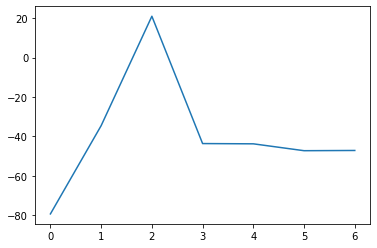

In [19]:
import pandas as pd
import numpy as np
import math
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import random
dataframe=pd.read_csv('A2Q1.csv',header=None)
data_array=dataframe.to_numpy()
pi=np.zeros(shape=(4))
p=np.zeros(shape=[4,1,50])
z=np.zeros(shape=[400,1])
error=[]
c=0
s=0
for i in range(0,400):
    z[i]=random.randint(0,3)
mean_array=np.zeros(shape=[4,50])
def calc_lamdas(k,pi,x,u,co):
    y=mvn.pdf(x,u[k][0],co[k],allow_singular=True)
    num = pi[k] * y
    den = 0
    i=0
    while(i<len(u)):
        y = mvn.pdf(x, u[i][0],co[i],allow_singular=True)
        den =den+ pi[i]*y
        i+=1
    return num/den
def cluster_points(k):
    points=0
    for i in range(0,400):
        if(z[i]==k):
            points=points+1
    return points
def get_points(k):
    p=[]
    for i in range(0,400):
        if(z[i]==k):
            p.append(data_array[i])
    return p
    
def calc_clustermean(k):
    sum_z=np.zeros(shape=[1,50])
    c=0
    for i in range(0,400):
        if(z[i]==k):
            sum_z=sum_z+data_array[i]
            c=c+1
    z_mean=sum_z/c
    return z_mean
def determinant(sigma):
    a,eig=np.linalg.eig(sigma)
    prod=1
    for i in a:
        if(i!=0):
            prod*=i
    return prod
mle1=[]
for x in range(2):
    j=0
    mle=[]
    d=50
    ##Re-initializing clusters
    for i in range(0,400):
        z[i]=random.randint(0,3)
    cl1 = np.array(get_points(0))
    cl2 = np.array(get_points(1))
    cl3 = np.array(get_points(2))
    cl4 = np.array(get_points(3))
    co1 = np.transpose(cl1)@(cl1)
    co2 = np.transpose(cl2)@(cl2)
    co3 = np.transpose(cl3)@(cl3)
    co4 = np.transpose(cl4)@(cl4)
    co = np.array([co1,co2,co3,co4])
    Pi1 = cluster_points(0)/400
    Pi2 = cluster_points(1)/400
    Pi3 = cluster_points(2)/400
    Pi4 = cluster_points(3)/400
    Pi = np.array([Pi1,Pi2,Pi3,Pi4])

    means = np.array([calc_clustermean(0),calc_clustermean(1),calc_clustermean(2),calc_clustermean(3)])
    ml_est = []
    threshold = 5/1000
    step_size = 1
    while(True):
        All_k = np.zeros(4)
        PiNew = np.zeros(4)
        coNew = np.zeros(shape=[4,50,50])
        m_n = np.zeros(shape=[4,1,50])
        lmda_val = np.zeros(shape=[4,400])
        i=0
        while(i<4):
            
            for j in range(400):
                lmda_val[i][j] = calc_lamdas(i,Pi,data_array[j],means,co)
                
                
            j = 0
            s = 0
            while(j<400):
                s += lmda_val[i][j]
                j+= 1
            All_k[i] = s
            j = 0
            while(j<400):
                m_n[i] += lmda_val[i][j]*data_array[j]
                j+=1

            PiNew[i] = All_k[i]/400
            m_n[i] = m_n[i]/All_k[i]
            temp = np.zeros(shape=(50,50))
            k=0
            while(k<400):
                mat = data_array[k] - m_n[i]
                mat = np.outer(mat.transpose(),mat)
                mat = lmda_val[i][k]*mat
                temp+=mat
                k+=1
            coNew[i] = temp/All_k[i]
            i+=1
        outer = 0
        print("Calculating log likelihood")
        n=0
        while(n<400):
            inner = 0
            for k in range(4):
                y=mvn.pdf(data_array[n],m_n[k][0],coNew[k],allow_singular=True)
                inner += PiNew[k]*y
            outer += math.log(inner)
            n+=1
        ml_est.append(outer)
        print(outer,"\n")
        if(np.linalg.norm(Pi-PiNew) < threshold):
            break
        step_size+=1
        Pi = PiNew
        co = coNew
        means = m_n
    mle1.append(ml_est)
max_size=0
for lis in mle1:
    m=len(lis)
    if(m>max_size):
        max_size=m
for lis in mle1:
    len_li=len(lis)
    while(len_li!=max_size):
        lis.append(lis[len_li-1])
        len_li+=1
    len_li=0
lis_arr=np.array(mle1)
# print(np.sum(lis_arr,axis=0)/100)
mle_avg=np.sum(lis_arr,axis=0)/100
plt.show(plt.plot(mle_avg))




